In [3]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import glob

In [4]:
def getUntrainedFiles(already_trained_files):
    filenames = glob.glob("data/*.csv")
    for file in already_trained_files:
        filenames.remove(file)
    return filenames

In [5]:
already_trained_files = ["data/2021:05:07:12.csv", "data/2021:05:07:13.csv"]
filenames = getUntrainedFiles(already_trained_files)
print(len(filenames))
print(filenames[0])
# for filename in filenames:
    # print(filenames)

313
data/2021:05:10:03.csv


In [19]:
def trainTestFile(filename):
    features = pd.read_csv(filename)
    date = filename[5:]
    date = date[:-4]
    features.head(5)
    features.describe()
    for i in range(len(features["time_of_day"])):
        date_time = datetime.strptime(features["time_of_day"][i], "%H:%M:%S")
        a_timedelta = date_time - datetime(1900,1,1)
        seconds = a_timedelta.total_seconds()
        features["time_of_day"][i] = seconds
    labels = np.array(features["temperature"])
    features = features.drop("temperature", axis = 1)
    feature_list = list(features.columns)
    features = np.array(features)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size= 0.25, random_state=42)
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    sc_X = StandardScaler()
    trainscaled_features = sc_X.fit_transform(train_features)
    testscaled_features = sc_X.transform(test_features)
    mlp = MLPRegressor(100, activation='logistic', solver='sgd',learning_rate='adaptive',learning_rate_init=0.01  ,warm_start=True, random_state=42)
    mlp.partial_fit(trainscaled_features, train_labels)
    predictions = mlp.predict(testscaled_features)
    errors = abs(predictions - test_labels)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    return date,accuracy

In [22]:
filenames.sort()
scores = {"date": [],"accuracy": []}
for filename in filenames:
    print(filename)
    date, accuracy = trainTestFile(filename)
    scores["date"].append(date)
    scores["accuracy"].append(accuracy)
    
    

ml#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
Training Features Shape: (1446, 2)
Training Labels Shape: (1446,)
Testing Features Shape: (482, 2)
Testing Labels Shape: (482,)
Mean Absolute Error: 0.46 degrees.
Accuracy: 98.2 %.
data/2021:05:18:06.csv
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
Training Features Shape: (1482, 2)
Training Labels Shape: (1482,)
Testing Features Shape: (494, 2)
Testing Labels Shape: (494,)
Mean Absolute Error: 0.35 degrees.
Accuracy: 98.61 %.
data/2021:05:18:07.csv
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

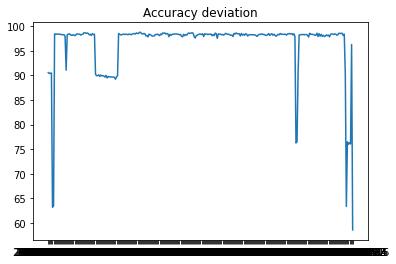

<Figure size 432x288 with 0 Axes>

In [29]:

for i in range(len(scores["date"])):
    scores["date"][i] = datetime.strptime(scores["date"][i], '%y:%m:%d:%H')
print(scores["date"])

%matplotlib inline
plt.plot(scores["date"], scores["accuracy"])
plt.title("Accuracy deviation")
plt.show()
plt.gcf().autofmt_xdate()
plt.show()

In [5]:
features = []
filenames.sort()
for filename in filenames:
    features.append(pd.read_csv(filename))
# all_features = pd.concat(features)
# all_features.describe()


In [2]:
def stringToDateTime(string):
    date_time = datetime.strptime(string, "%H:%M:%S")
    a_timedelta = date_time - datetime(1900,1,1)
    return a_timedelta.total_seconds()

In [ ]:
for feature in features:
    for i in range(len(feature["time_of_day"])):
        try:
            date_time = datetime.strptime(feature["time_of_day"][i], "%H:%M:%S")
            a_timedelta = date_time - datetime(1900,1,1)
            seconds = a_timedelta.total_seconds()
            feature["time_of_day"][i] = seconds
        except:
            print(i)

In [10]:
for i in range(len(all_features["time_of_day"])):
    try:
        date_time = datetime.strptime(all_features["time_of_day"][i], "%H:%M:%S")
        a_timedelta = date_time - datetime(1900,1,1)
        seconds = a_timedelta.total_seconds()
        all_features["time_of_day"][i] = seconds
    except:
        print("f")
all_features.describe()

IndentationError: unexpected unindent (<ipython-input-10-2c6f137bf659>, line 7)